In [ ]:
print("Welcome To PyTorch WorkFlow")

Welcome To PyTorch WorkFlow


In [ ]:
what_we_are_covering = {1: "Data (Prepare and Load)",
                        2: "Build Model",
                        3: "Filtering The Model to data (Training)",
                        4: "Making Predictions and Evaluationg a model(inference)",
                        5: "Saving and Loading a Model",
                        6: "Puting it all to gather"}
what_we_are_covering

{1: 'Data (Prepare and Load)',
 2: 'Build Model',
 3: 'Filtering The Model to data (Training)',
 4: 'Making Predictions and Evaluationg a model(inference)',
 5: 'Saving and Loading a Model',
 6: 'Puting it all to gather'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for Neural Networks
import matplotlib.pyplot as plt


# Check Pytorch version'
torch.__version__

'2.0.0+cu118'

In [ ]:
# Data (Preparing and Loading Data)
# Creating Simple data set using Linear Regression

In [ ]:
#Creating Known Parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y = weight * X + bias

X[:10], Y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(Y)

(50, 50)

In [ ]:
#Spliting Data  into training and testing sets (one of the most important concepts in ML in general)


In [ ]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split: ], Y[train_split: ]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  plt.figure(figsize= (10, 7))

  # Plot training data in blue

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data ")

  #Plot test data in green

  plt.scatter(test_data, test_labels, c = "g",  s = 4, label = "Testing data ")

  # Are there Predictions
  if predictions is not None:
    #Plot  the Predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

    # Show the legend
  plt.legend(prop={"size": 14})



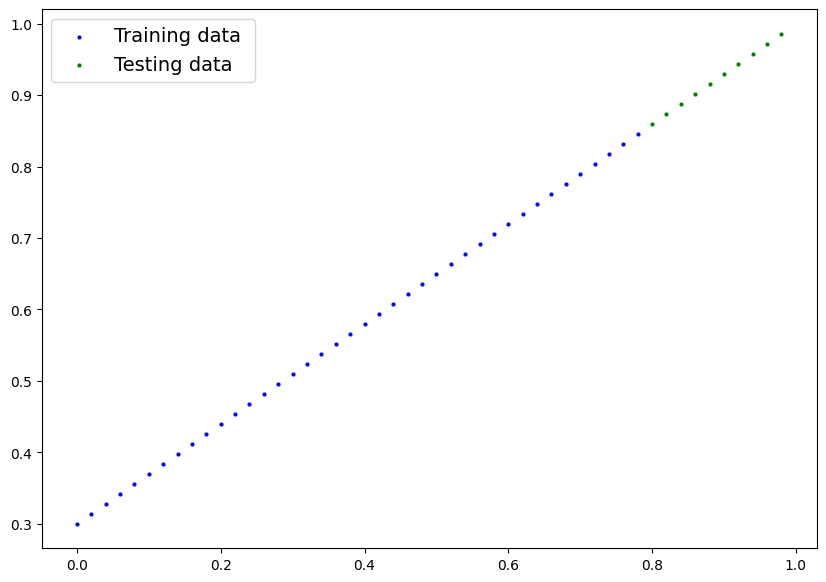

In [ ]:
plot_predictions()

In [ ]:
# Build Model


In [ ]:
#PyTorch First Model
# Creating Linear Regression Model
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # X is the input data
    return self.weights * x + self.bias # this is the linear regression model formul


In [ ]:
# PyTorch Building essentials

In [ ]:
# Checking the content of our PyTorch Model

# Creating random seed

torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

In [ ]:
# check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict() # List name parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Make predictions with Model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

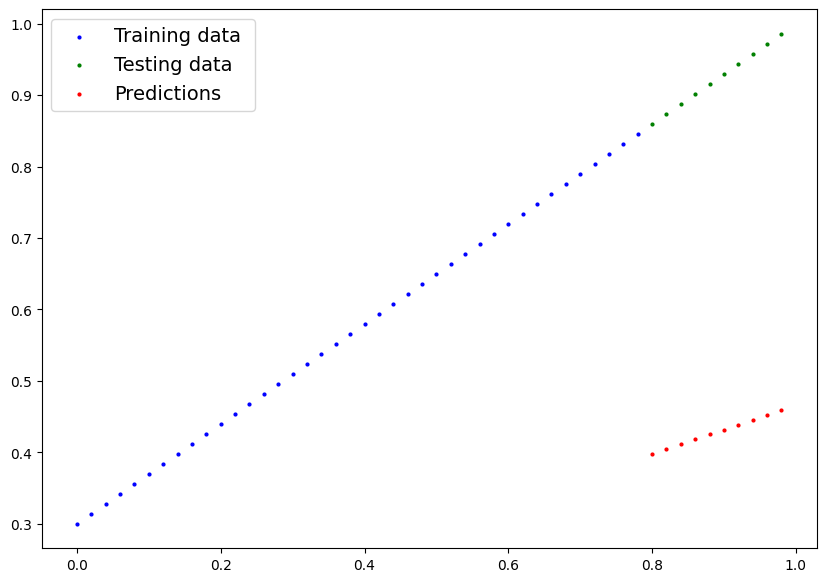

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# Train model
with torch.inference_mode():
  list(model_0.eval().parameters())
list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


In [ ]:
# Setup an Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # it only adjusts the model/ LR shows Learning rate

In [ ]:
# Training

torch.manual_seed(42)
epochs = 200


# tracking Different value
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()


  #Forward Pass
  y_preds = model_0(X_train)

  #Calculate loss function
  loss = loss_fn(y_preds, Y_train)


  # Optimizer zero grad
  optimizer.zero_grad()

  #Perform back propagation
  loss.backward()

  # Step the optimizer

  optimizer.step()

# Testing
  model_0.eval() # turn off gradient tracking

  with torch.inference_mode():
    test_pred = model_0(X_test)
  #with torch.no_grad():


 # Calculate the Loss
  test_loss = loss_fn(test_pred, Y_test)

# print out what happing
  if epoch % 40 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epochs: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

  print(f"Loss:  {loss}")

Epochs: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss:  0.31288138031959534
Loss:  0.3013603389263153
Loss:  0.28983935713768005
Loss:  0.2783183455467224
Loss:  0.26679736375808716
Loss:  0.2552763521671295
Loss:  0.24375534057617188
Loss:  0.23223432898521423
Loss:  0.22071333229541779
Loss:  0.20919232070446014
Loss:  0.1976713240146637
Loss:  0.18615034222602844
Loss:  0.1746293306350708
Loss:  0.16310831904411316
Loss:  0.1515873372554779
Loss:  0.14006635546684265
Loss:  0.1285453587770462
Loss:  0.11702437698841095
Loss:  0.1060912236571312
Loss:  0.09681284427642822
Loss:  0.08908725529909134
Loss:  0.08227583020925522
Loss:  0.07638873159885406
Loss:  0.07160007208585739
Loss:  0.06747635453939438
Loss:  0.06395438313484192
Loss:  0.06097004935145378
Loss:  0.05845819041132927
Loss:  0.05635259300470352
Loss:  0.0545857772231102
Loss:  0.053148526698350906
Loss:  0.05181945487856865


In [ ]:
epoch_count, loss_values, test_loss_values

([0, 40, 80, 120, 160],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.1136),
  tensor(0.0723),
  tensor(0.0406),
  tensor(0.0082)])

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.04543797, 0.03132383, 0.01758547, 0.00385178],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.1136),
  tensor(0.0723),
  tensor(0.0406),
  tensor(0.0082)])

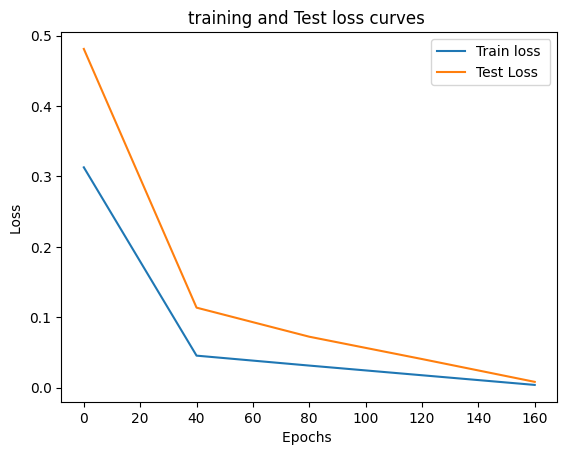

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss ")
plt.plot(epoch_count, test_loss_values,label= "Test Loss " )
plt.title("training and Test loss curves ")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")
plt.legend();

In [ ]:
 with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

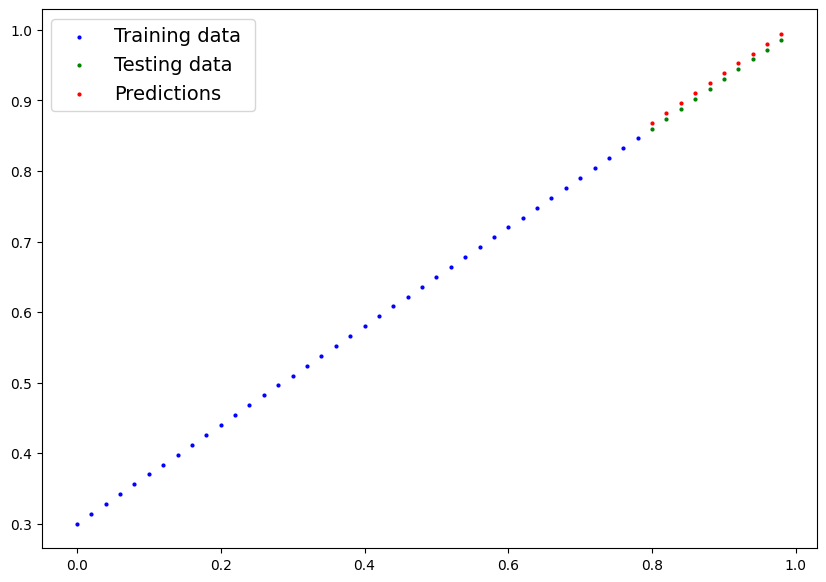

In [ ]:
plot_predictions(predictions=y_preds_new);

In [ ]:
# Saving a model in PyTorch
from pathlib import Path


 # 1. Create Model Directory
MODEL_PATH = Path("Models ")
MODEL_PATH.mkdir(parents = True, exist_ok =True)

 # 2. Create Model Save Path
MODEL_NAME = "PyTorch_Workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. Save the Model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving Model to: Models /PyTorch_Workflow.pth


In [ ]:
# Loading a PyTorch Model
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with the original model
y_preds == loaded_model_preds


RuntimeError: ignored

In [ ]:
#Confrimation Check
y_preds

In [ ]:
#Check prediction
loaded_model_preds